# Load data

In [201]:
import pandas as pd
dataset_scores = pd.read_pickle('labels.pkl')
features = pd.read_pickle('features.pkl')
dataset_scores_rm=pd.read_pickle('labels_rm.pkl')
features_rm=pd.read_pickle('features_rm.pkl')

# Import function & library 

In [202]:
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.model_selection import GroupShuffleSplit

In [203]:
from sklearn import svm
from sklearn import multiclass 
from scipy import stats

In [259]:
from sklearn.preprocessing import normalize
from sklearn import utils

In [205]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Define functions for grid search and scoring**

In [206]:
def CV_Generator(features, labels, group_label, n=8, test_ratio=0.2):
    CV_Group = GroupShuffleSplit(n_splits=n, test_size=test_ratio, random_state=8)
    for train, test in CV_Group.split(features, labels, groups=group_label):
        yield train, test

In [207]:
def accuracy(y_true, y_pred):
    ratio = abs(y_true - y_pred) / y_true
    return 1 - np.mean(ratio)

In [208]:
def rmse(y_true, y_pred):
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    return rmse

def lcc(y_true, y_pred):
    lcc, _ = stats.pearsonr(y_true, y_pred)
    return lcc

def srocc(y_true, y_pred):
    srocc, _ = stats.spearmanr(y_true, y_pred)
    return srocc

In [209]:
features.head()

,msssim,psnr,psnrhvs,psnrhvsm,ssim,vifp,Blockiness,Blockloss,Blur,Contrast,Exposure(bri),Flickering,Interlace,Noise,SA,TA
G10BoatInPark_ERP_4096x2048_fps30_qp27_14547k.mp4,0.993424,41.829451,39.401728,43.855814,0.989905,0.818723,0.918001,4.662472,6.318822,56.274408,122.973648,0.973981,0.004543,0.385048,48.017774,12.572215
G10BoatInPark_ERP_4096x2048_fps30_qp37_3270k.mp4,0.978172,37.045777,34.074029,36.540714,0.975696,0.721947,0.923023,5.707591,6.802874,56.220687,122.235861,0.974016,0.001439,0.250219,45.613703,12.228131
G10BoatInPark_ERP_4096x2048_fps30_qp42_1507k.mp4,0.959965,34.534499,31.430402,33.216521,0.962685,0.672978,0.923070,6.641128,7.194109,56.157094,121.932088,0.973082,0.001407,0.243489,42.835611,11.782598
G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp27_6105k.mp4,0.997337,46.713699,44.069635,48.525252,0.997130,0.915188,0.941557,1.083126,10.663758,107.170623,125.000000,0.975835,0.000408,0.691092,55.521111,3.173898
G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp37_913k.mp4,0.993475,42.391911,39.490941,42.097111,0.994158,0.873338,0.916841,0.990191,10.873596,107.176925,124.268885,0.970290,0.001945,0.350776,55.119636,3.099582


**Perform Principal Component Analysis(PCA)**

In [210]:
pca=PCA(n_components=1)
pca.fit(features)
X=pca.transform(features)

In [211]:
#sort the feature after PCA and the datascores
x_sort=np.sort(X,axis=0)
x_index=np.argsort(X,axis=0)
dataset_scores_sort=dataset_scores[x_index]

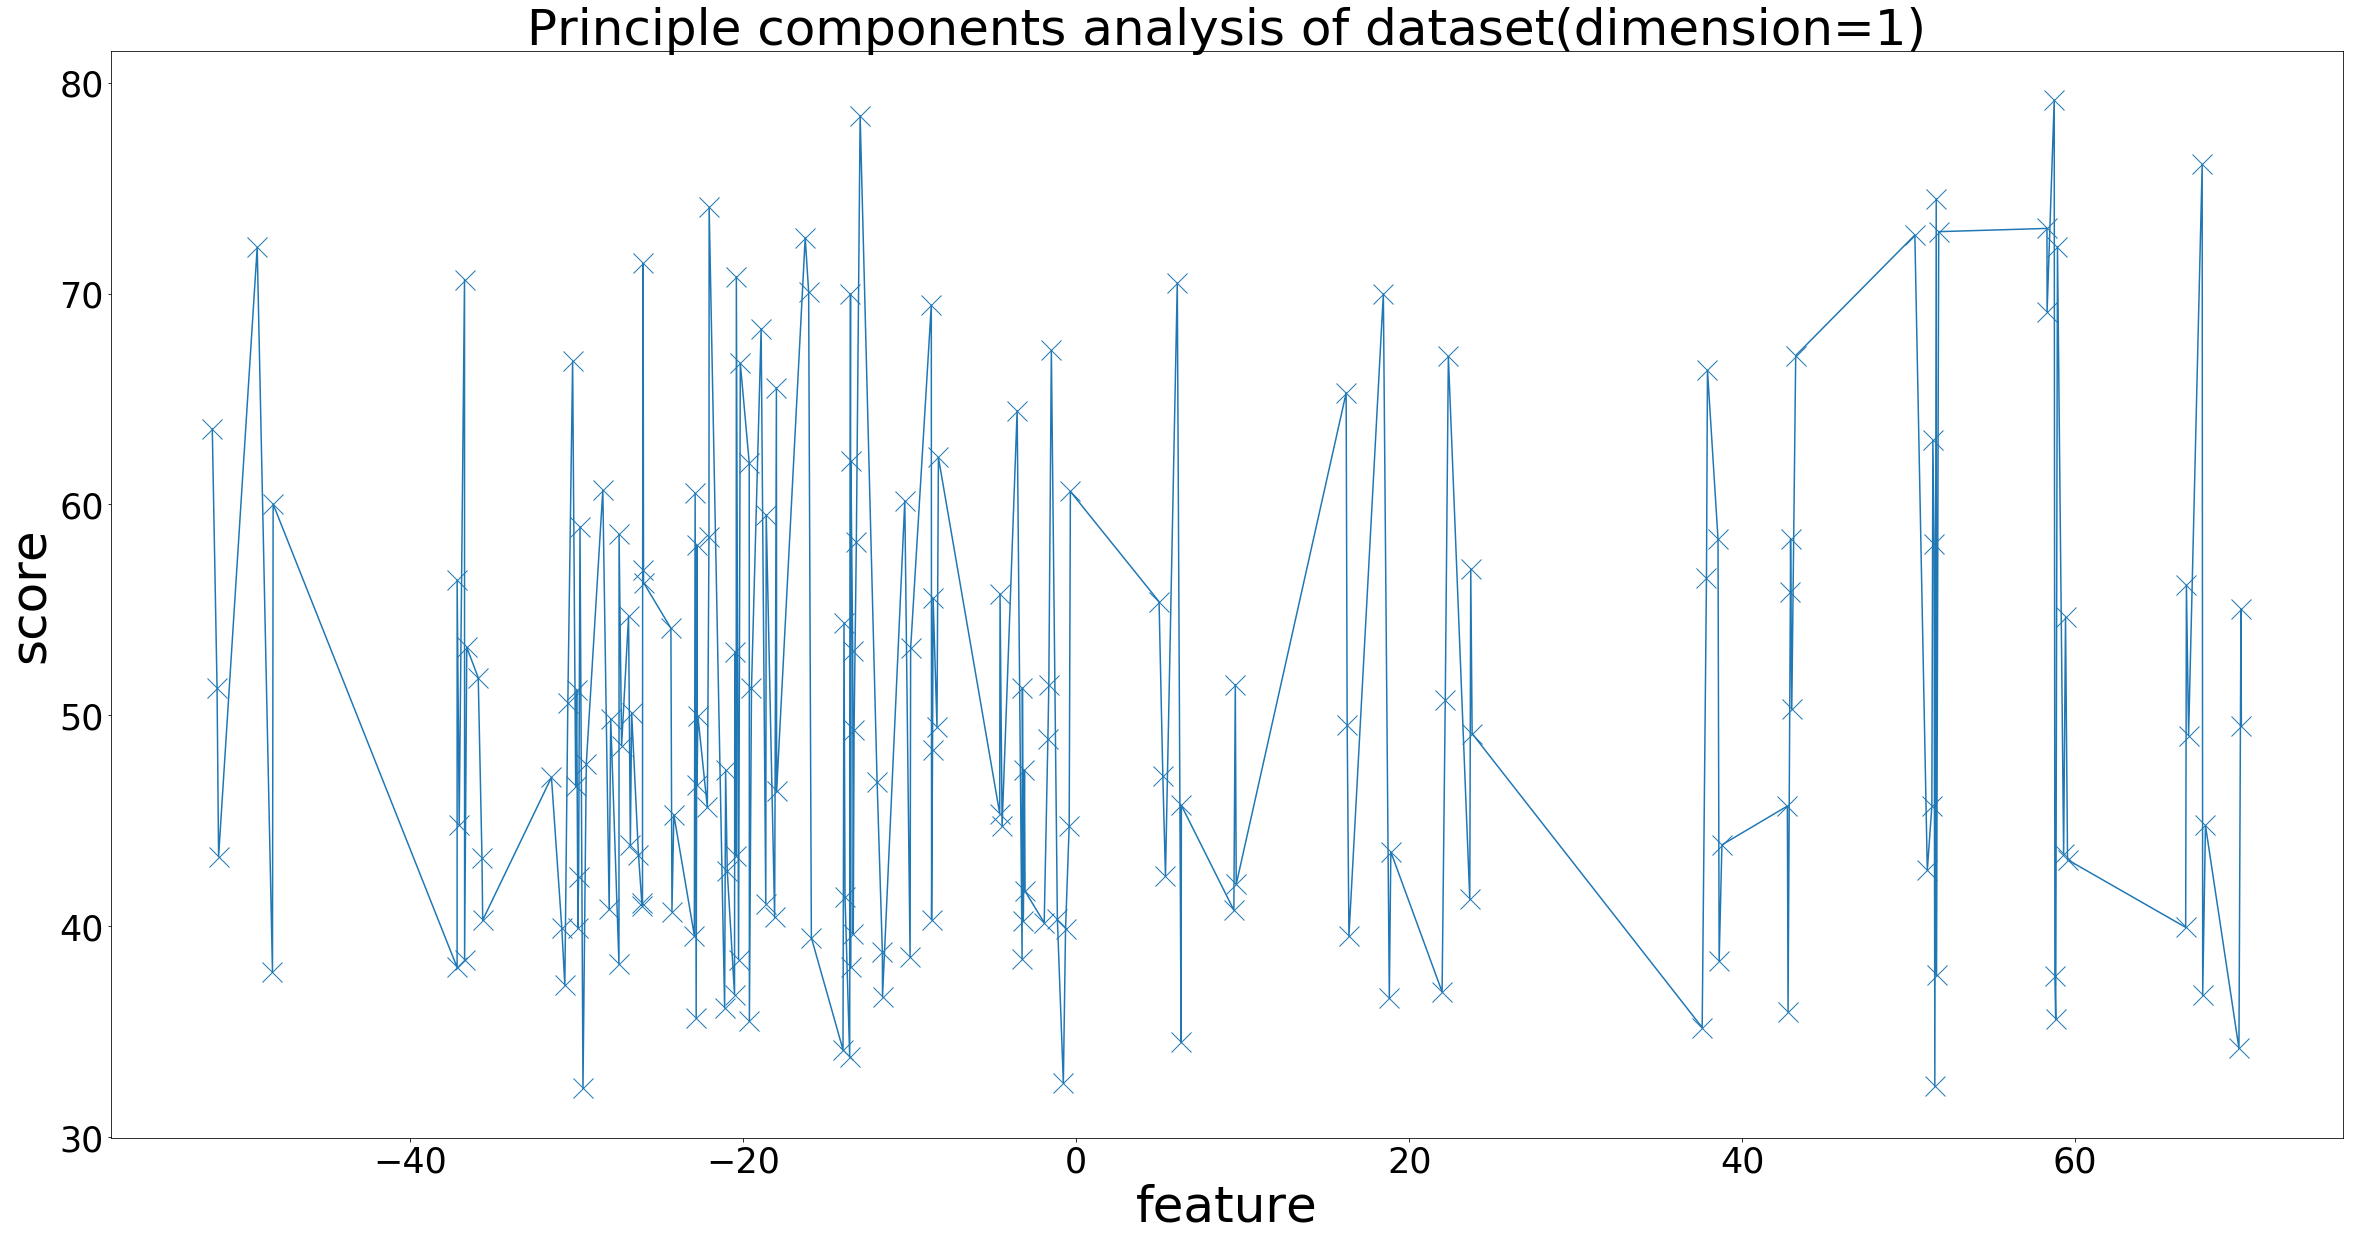

In [212]:
fig, ax1 = plt.subplots(figsize=(40,20))
ax1.plot(x_sort,dataset_scores_sort,'-x',markersize=20)
ax1.tick_params(labelsize=35)
ax1.set_xlabel('feature',fontsize=50)
ax1.set_ylabel('score',fontsize=50)
ax1.set_title('Principle components analysis of dataset(dimension=1)',fontsize=50)
plt.savefig('pca.pdf')

In [213]:
group_label = np.arange(len(features.index) / 3)
group_label = np.matlib.repmat(group_label,3,1)
group_label = group_label.reshape(-1,1, order='F')

In [214]:
scorer = {}
scorer['rmse'] = metrics.make_scorer(rmse, greater_is_better=False)
scorer['lcc'] = metrics.make_scorer(lcc, greater_is_better=True)
scorer['srocc'] = metrics.make_scorer(srocc, greater_is_better=True)
scorer

{'rmse': make_scorer(rmse, greater_is_better=False),
 'lcc': make_scorer(lcc),
 'srocc': make_scorer(srocc)}

# grid search

In [251]:
#define svr model
model_svr = svm.SVR(max_iter=3000)

In [253]:
#grid search for the best parameters for SVR
ParameterGrid={}
ParameterGrid['C']=np.arange(1,50,1) 
ParameterGrid['gamma']= [0.01, 0, 'auto', 'scale']
ParameterGrid['verbose'] = [0, 1]
ParameterGrid['degree'] = [2, 3]
ParameterGrid['kernel'] = ['rbf', 'poly']
ParameterGrid['tol'] = [0.1, 0.01, 0.001]
#ParameterGrid['epsilon'] = np.arange(0.05,0.15,0.01)

In [254]:
grid_search_svr= GridSearchCV(estimator = model_svr, param_grid = ParameterGrid, 
                          cv = CV_Generator(features, dataset_socres, group_label), n_jobs = -1, verbose = 1, return_train_score=True, 
                                      error_score = np.nan,scoring = scorer, refit = 'rmse', iid=False)

In [266]:
a = normalize(features,norm='l2')

In [271]:
dataset_scores.shape

(177,)

In [269]:
grid_search_svr.fit(a, dataset_scores)

Fitting 0 folds for each of 4704 candidates, totalling 0 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   0 out of   0 | elapsed:    0.0s finished


ValueError: not enough values to unpack (expected 5, got 0)

In [249]:
grid_search_svr.best_params_

{'C': 3,
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'tol': 0.01,
 'verbose': 0}

In [250]:
idx = 0
for train_idx, test_idx in CV_Generator(features, dataset_socres, group_label, 16, test_ratio=0.2):
    train_features = features.iloc[train_idx]
    train_labels = dataset_socres.iloc[train_idx]
    test_features = features.iloc[test_idx]
    test_labels = dataset_socres.iloc[test_idx]
    best_model = grid_search_svr.best_estimator_.fit(train_features, train_labels)
    train_pred = best_model.predict(train_features)
    test_pred = best_model.predict(test_features)
    if idx == 0:
        final_model = best_model
        print('Model saved')
    print('RMSE:', rmse(train_labels, train_pred), rmse(test_labels, test_pred))
    print('LCC:', lcc(train_labels, train_pred), lcc(test_labels, test_pred))
    print('SROCC:', srocc(train_labels, train_pred), srocc(test_labels, test_pred))
    #print('Accuracy:', accuracy(train_labels, train_pred), accuracy(test_labels, test_pred))
    print('\n')
    idx += 1

/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Conv

Model saved
RMSE: 6.9983355287454385 6.67323425040578
LCC: 0.8050279037606641 0.848223162485971
SROCC: 0.8204974528019178 0.8970398970398971


RMSE: 6.642803084608745 8.17537929957905
LCC: 0.795103121061165 0.8949746381376198
SROCC: 0.8188578278179716 0.864864864864865


RMSE: 6.944682832138625 6.329586211630895
LCC: 0.8253134757535048 0.7728931134579368
SROCC: 0.846607303394837 0.802831402831403


RMSE: 6.621008342533024 10.260643114484113
LCC: 0.8295599699925883 0.5688495799092544
SROCC: 0.8556402243246714 0.6167310167310168


RMSE: 6.2185764018590035 9.977123487877577
LCC: 0.8568925076735333 0.6183362677628897
SROCC: 0.8864763046363285 0.6087516087516088


RMSE: 6.904665498114902 7.802039184432271
LCC: 0.8215924125507806 0.7724395766242782
SROCC: 0.8371377199366411 0.8164736164736165


RMSE: 6.643451702943237 7.621153743172115
LCC: 0.8216681448441421 0.7909985894555888
SROCC: 0.8502632818185708 0.7722007722007721


RMSE: 6.761259153875112 6.378328636796094
LCC: 0.8228271267203542 0.

/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Conv

#  plot results 

In [235]:
import matplotlib.pyplot as plt

In [236]:
pre_score_train=final_model.predict(train_features)
#prediction on the test set
pre_score_test=final_model.predict(test_features)

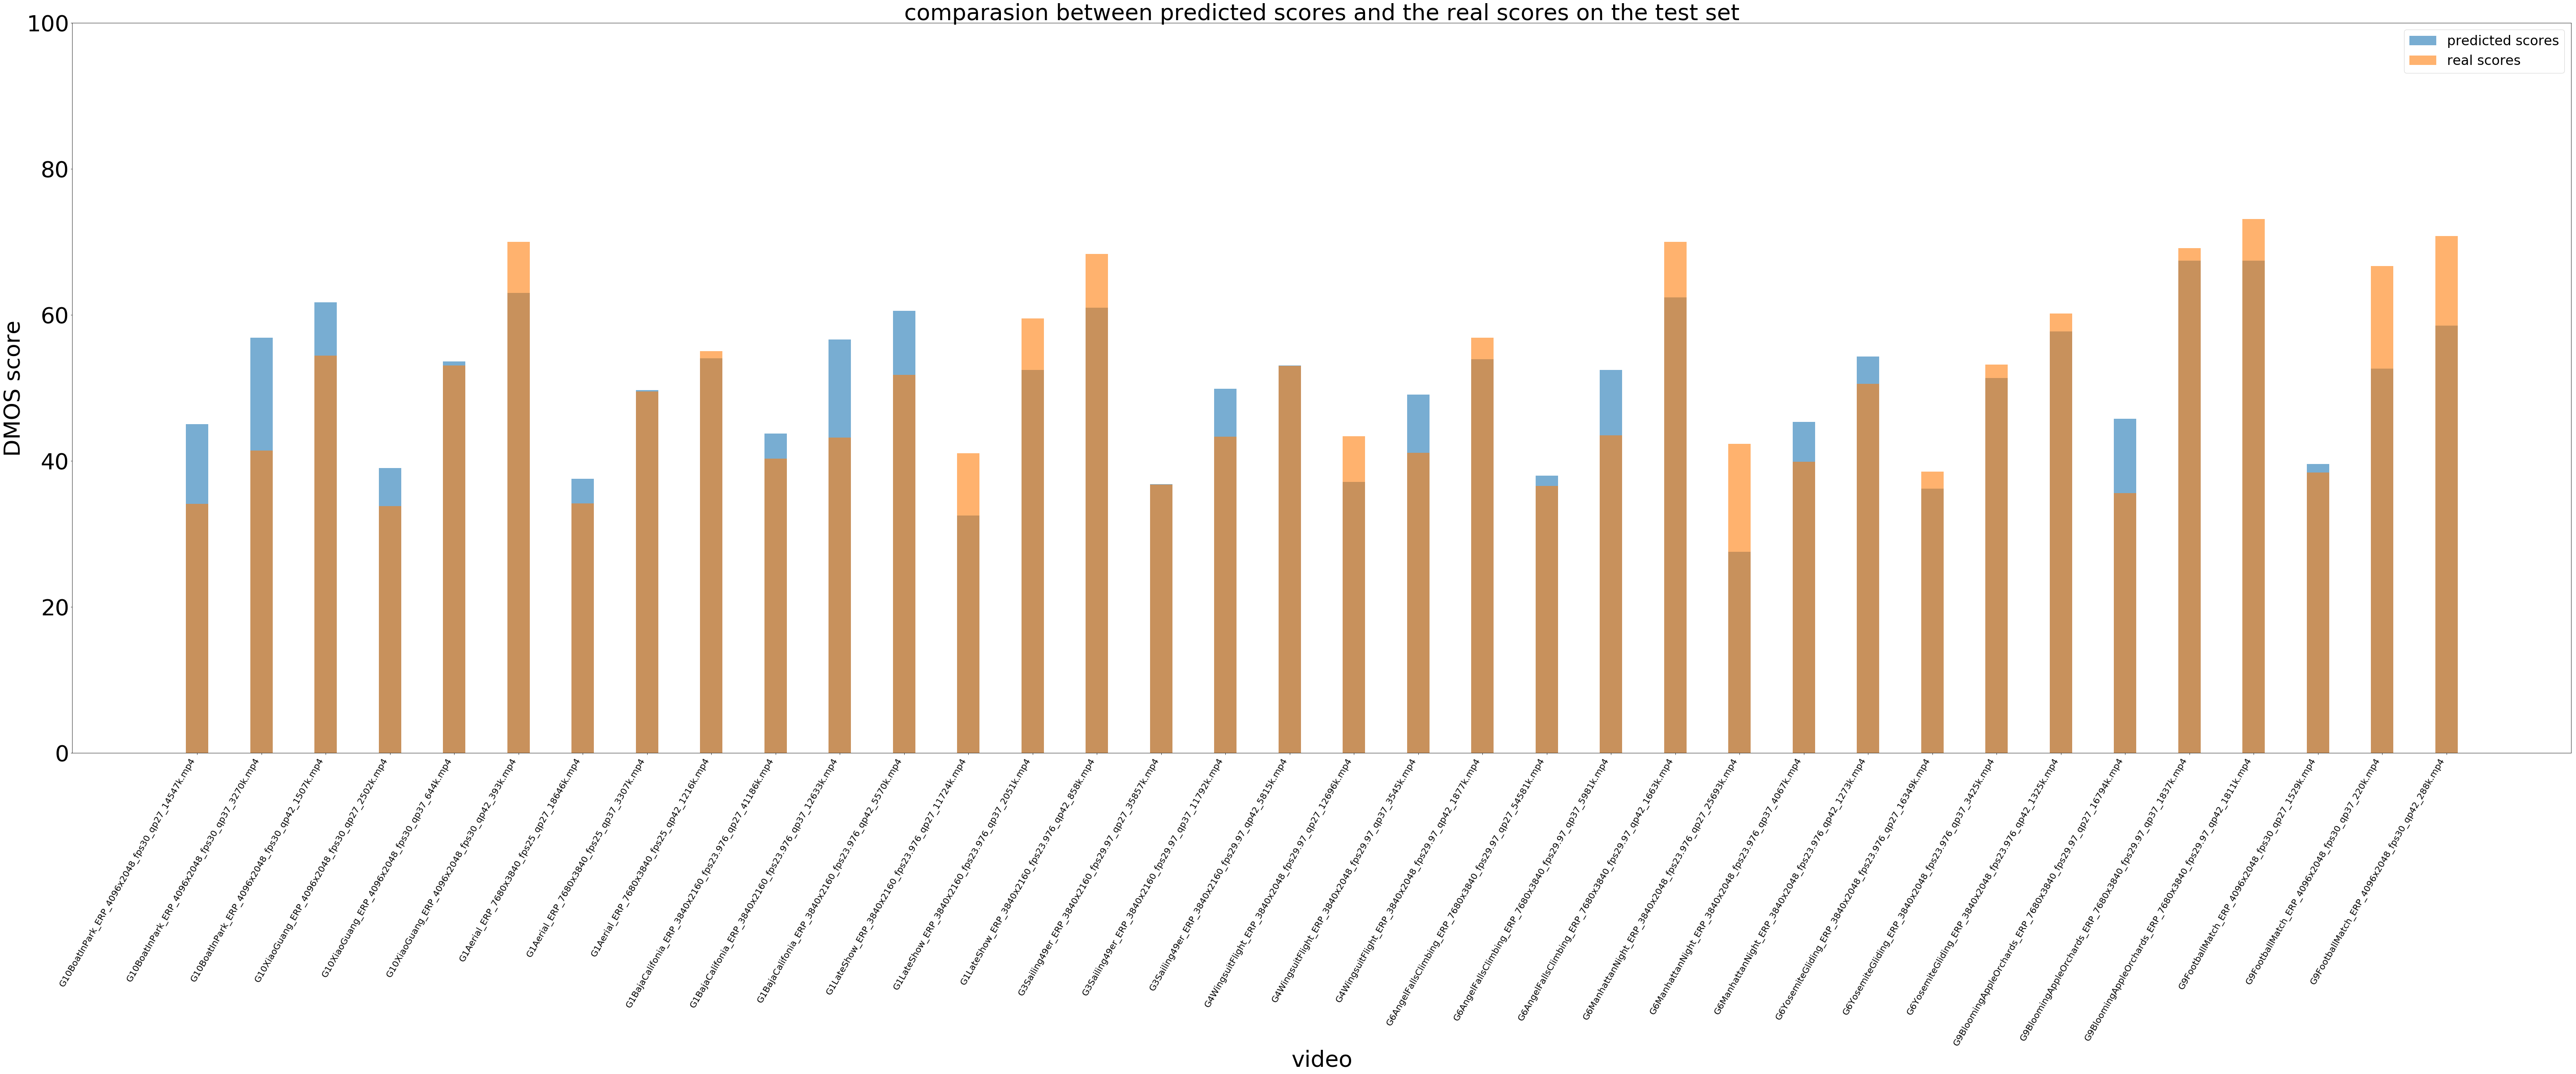

In [237]:
plt.subplots(figsize=(100,30))
plt.title('comparasion between predicted scores and the real scores on the test set',fontsize=50) 
plt.xlabel('video',fontsize=50)
plt.ylabel('DMOS score',fontsize=50)
y_label=test_labels.index
plt.tick_params(labelsize=50)
# set interval for y label
plt.xticks(np.arange(test_labels.index.size),y_label,rotation = 60, fontsize = 20,ha='right')
plt.ylim([0,100])
plt.bar(np.arange(test_labels.index.size),pre_score_test,label="predicted scores",width=0.35,alpha=0.6,linewidth=20)
plt.bar(np.arange(test_labels.index.size),test_labels,label="real scores",width=0.35,alpha=0.6,linewidth=20)
plt.legend(fontsize=30)
plt.savefig("comparasion_predit_real.pdf")

# model comparison

In [225]:
# do CV with the same grid search parameters using removed dataset scores
idx = 0
for train_idx, test_idx in CV_Generator(features, dataset_socres_rm, group_label, 16, test_ratio=0.2):
    train_features = features.iloc[train_idx]
    train_labels = dataset_socres.iloc[train_idx]
    test_features = features.iloc[test_idx]
    test_labels = dataset_socres.iloc[test_idx]
    best_model = grid_search_svr.best_estimator_.fit(train_features, train_labels)
    train_pred = best_model.predict(train_features)
    test_pred = best_model.predict(test_features)
    if idx == 5:
        final_model_score_rm = best_model
        print('Model saved')
    print('RMSE:', rmse(train_labels, train_pred), rmse(test_labels, test_pred))
    print('LCC:', lcc(train_labels, train_pred), lcc(test_labels, test_pred))
    print('SROCC:', srocc(train_labels, train_pred), srocc(test_labels, test_pred))
    #print('Accuracy:', accuracy(train_labels, train_pred), accuracy(test_labels, test_pred))
    print('\n')
    idx += 1

RMSE: 6.986658721983048 6.648623253804233
LCC: 0.8065163966151297 0.8539283544003174
SROCC: 0.8180101887923282 0.8918918918918919


RMSE: 6.609006497552591 8.360049797638371
LCC: 0.7979821300049851 0.9061227761464326
SROCC: 0.8229932788218672 0.8944658944658945


RMSE: 7.1281985751366745 6.362743795006484
LCC: 0.8135744316455852 0.7652973405639004
SROCC: 0.8337300398133481 0.786872586872587


RMSE: 6.758028324521133 10.223231057174667
LCC: 0.8221104494316273 0.5849890900289059
SROCC: 0.8481227792285628 0.616988416988417


RMSE: 6.2600435942182395 10.406449096234644
LCC: 0.8546369302108063 0.5969545855948395
SROCC: 0.8827004580675542 0.5824967824967825


Model saved
RMSE: 7.030098296994071 7.638904164147455
LCC: 0.8147752239638235 0.7747047262781105
SROCC: 0.8336915107667279 0.8205920205920207


RMSE: 6.655848715453925 7.666288681120583
LCC: 0.8208486666701423 0.7883683688364046
SROCC: 0.8498180572798492 0.7608751608751609


RMSE: 7.018465775435337 6.486033593794257
LCC: 0.8085804779041

/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

In [226]:
# do CV with the same grid search parameters using removed features
idx = 0
for train_idx, test_idx in CV_Generator(features_rm, dataset_socres, group_label, 16, test_ratio=0.2):
    train_features = features.iloc[train_idx]
    train_labels = dataset_socres.iloc[train_idx]
    test_features = features.iloc[test_idx]
    test_labels = dataset_socres.iloc[test_idx]
    best_model = grid_search_svr.best_estimator_.fit(train_features, train_labels)
    train_pred = best_model.predict(train_features)
    test_pred = best_model.predict(test_features)
    if idx == 5:
        final_model_feature_rm = best_model
        print('Model saved')
    print('RMSE:', rmse(train_labels, train_pred), rmse(test_labels, test_pred))
    print('LCC:', lcc(train_labels, train_pred), lcc(test_labels, test_pred))
    print('SROCC:', srocc(train_labels, train_pred), srocc(test_labels, test_pred))
    #print('Accuracy:', accuracy(train_labels, train_pred), accuracy(test_labels, test_pred))
    print('\n')
    idx += 1

RMSE: 6.986658721983048 6.648623253804233
LCC: 0.8065163966151297 0.8539283544003174
SROCC: 0.8180101887923282 0.8918918918918919


RMSE: 6.609006497552591 8.360049797638371
LCC: 0.7979821300049851 0.9061227761464326
SROCC: 0.8229932788218672 0.8944658944658945


RMSE: 7.1281985751366745 6.362743795006484
LCC: 0.8135744316455852 0.7652973405639004
SROCC: 0.8337300398133481 0.786872586872587


RMSE: 6.758028324521133 10.223231057174667
LCC: 0.8221104494316273 0.5849890900289059
SROCC: 0.8481227792285628 0.616988416988417


RMSE: 6.2600435942182395 10.406449096234644
LCC: 0.8546369302108063 0.5969545855948395
SROCC: 0.8827004580675542 0.5824967824967825


Model saved
RMSE: 7.030098296994071 7.638904164147455
LCC: 0.8147752239638235 0.7747047262781105
SROCC: 0.8336915107667279 0.8205920205920207


RMSE: 6.655848715453925 7.666288681120583
LCC: 0.8208486666701423 0.7883683688364046
SROCC: 0.8498180572798492 0.7608751608751609


RMSE: 7.018465775435337 6.486033593794257
LCC: 0.8085804779041

/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Guest/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

In [227]:
ParameterGrid_cv={}
ParameterGrid_cv['C']=np.arange(20,30,1) 
ParameterGrid_cv['gamma']= [0.01, 0, 'auto', 'scale']
ParameterGrid_cv['verbose'] = [0, 1]
ParameterGrid_cv['kernel'] = ['rbf']
ParameterGrid_cv['tol'] = [0.1, 0.01, 0.001]
ParameterGrid_cv['epsilon'] = np.arange(0.05,0.15,0.01)

In [228]:
#do grid search without grouped label cross validation
grid_search_svr_cv= GridSearchCV(estimator = model_svr, param_grid = ParameterGrid_cv, 
                          cv = 8, n_jobs = -1, verbose = 1, return_train_score=True, 
                                      error_score = np.nan,scoring = scorer, refit = 'rmse', iid=False)

In [229]:
grid_search_svr_cv.fit(features, dataset_socres)

Fitting 8 folds for each of 2400 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 5868 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 10768 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 17068 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 19200 out of 19200 | elapsed:  1.3min finished


GridSearchCV(cv=8, error_score=nan,
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=3000, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'C': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'gamma': [0.01, 0, 'auto', 'scale'], 'verbose': [0, 1], 'kernel': ['rbf'], 'tol': [0.1, 0.01, 0.001], 'epsilon': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14])},
       pre_dispatch='2*n_jobs', refit='rmse', return_train_score=True,
       scoring={'rmse': make_scorer(rmse, greater_is_better=False), 'lcc': make_scorer(lcc), 'srocc': make_scorer(srocc)},
       verbose=1)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(features, dataset_socres, test_size=0.2, random_state=0)

In [231]:
model_cv=grid_search_svr_cv.best_estimator_.fit(X_train,y_train)
y_train_pred=model_cv.predict(X_train)
y_test_pred=model_cv.predict(X_test)

In [232]:
print('RMSE:', rmse(y_train, y_train_pred), rmse(y_test, y_test_pred))
print('lcc:', lcc(y_train, y_train_pred), lcc(y_test, y_test_pred))
print('srocc:', srocc(y_train, y_train_pred), srocc(y_test, y_test_pred))

RMSE: 3.7865178494164122 9.164154997202235
lcc: 0.9523823690575567 0.5987593435404021
srocc: 0.9592105826448049 0.588931788931789
